In [ ]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Import data
data = pd.read_csv('data/college_state_pop.csv')

Question of Interest:

What factors influence graduation rates across 1000 US schools. 

In [ ]:
# View the first 5 rows of the data.
data.head()

,Student_Size,Tuition_In_State,Tuition_Out_State,Female_Share,Race_White,Race_Black,Race_Hispanic,Race_Asian,Race_AIAN,Race_NHPI,Race_Two_Or_More,Grad_Rate,School_Name,City,State,id,July_Estimate_2024,Region
0,5726.0,10024.0,18634.0,0.564030,0.0180,0.9043,0.0150,0.0017,0.0012,0.0010,0.0182,0.2772,Alabama A & M University,Normal,AL,100654,2381817.0,South
1,12118.0,8832.0,21864.0,0.639091,0.4832,0.2657,0.0776,0.0915,0.0020,0.0007,0.0515,0.6345,University of Alabama at Birmingham,Birmingham,AL,100663,2381817.0,South
2,226.0,NaN,NaN,0.648649,0.2788,0.6681,0.0310,0.0000,0.0044,0.0044,0.0000,NaN,Amridge University,Montgomery,AL,100690,2381817.0,South
3,6650.0,11770.0,24662.0,0.476350,0.6940,0.0907,0.0719,0.0423,0.0074,0.0015,0.0508,0.6240,University of Alabama in Huntsville,Huntsville,AL,100706,2381817.0,South
4,3322.0,11248.0,19576.0,0.613419,0.0223,0.9082,0.0111,0.0018,0.0015,0.0012,0.0126,0.2884,Alabama State University,Montgomery,AL,100724,2381817.0,South


In [ ]:
#Count the NA values for each variable.

na_counts = data.isna().sum()
print(na_counts)

Student_Size           63
Tuition_In_State      274
Tuition_Out_State     274
Female_Share          137
Race_White             63
Race_Black             63
Race_Hispanic          63
Race_Asian             63
Race_AIAN              63
Race_NHPI              63
Race_Two_Or_More       63
Grad_Rate             122
School_Name             0
City                    0
State                   0
id                      0
July_Estimate_2024     12
Region                374
dtype: int64


In [ ]:
#take the mean grad rate for each state and replace the na values in grad rate with the mean for the state

data['Grad_Rate']= data['Grad_Rate'].fillna(data.groupby('State')['Grad_Rate'].transform('mean'))

#same for in state and out state tuition.

data['Tuition_In_State']= data['Tuition_In_State'].fillna(data.groupby('State')['Tuition_In_State'].transform('mean'))

data['Tuition_Out_State']= data['Tuition_Out_State'].fillna(data.groupby('State')['Tuition_Out_State'].transform('mean'))


In [ ]:
#Recount the na values to see if improvement.
na_counts = data.isna().sum()
print(na_counts)

Student_Size           63
Tuition_In_State        1
Tuition_Out_State       1
Female_Share          137
Race_White             63
Race_Black             63
Race_Hispanic          63
Race_Asian             63
Race_AIAN              63
Race_NHPI              63
Race_Two_Or_More       63
Grad_Rate               1
School_Name             0
City                    0
State                   0
id                      0
July_Estimate_2024     12
Region                374
dtype: int64


<Axes: xlabel='Tuition_In_State', ylabel='Grad_Rate'>

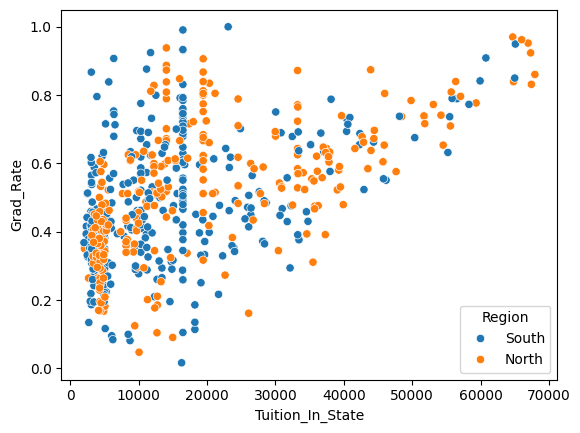

In [7]:
# scatter x= grad rate ; y= tuition instate ; hue = region

sns.scatterplot(data=data, x="Tuition_In_State", y="Grad_Rate", hue="Region")

<Axes: xlabel='Tuition_Out_State', ylabel='Grad_Rate'>

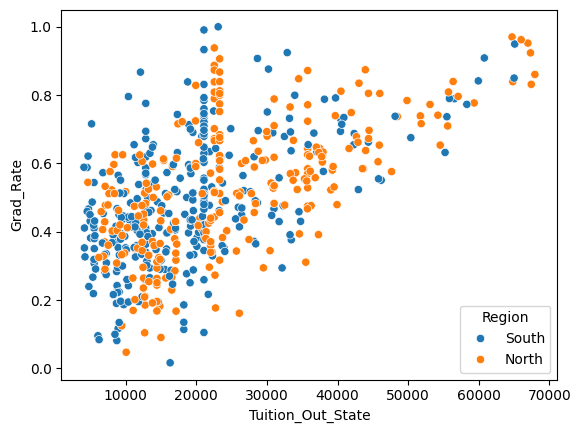

In [ ]:
# Scatter plot 

sns.scatterplot(data=data,x="Tuition_Out_State",y="Grad_Rate", hue="Region")

In [9]:
#group by region compute mean

region_grp_grad = data.groupby('Region')['Grad_Rate'].mean()
print(region_grp_grad)

Region
North    0.528275
South    0.485431
Name: Grad_Rate, dtype: float64


In [ ]:
# group by region and in state tuition and compute mean
region_grp_intut = data.groupby('Region')['Tuition_In_State'].mean()
print(region_grp_intut)

Region
North    20369.205183
South    14862.482362
Name: Tuition_In_State, dtype: float64


In [ ]:
# Group by region and compute mean of out of state tuition
region_grp_outtut = data.groupby('Region')['Tuition_Out_State'].mean()
print(region_grp_outtut)

Region
North    25344.315139
South    18830.970052
Name: Tuition_Out_State, dtype: float64


In [ ]:
#Group by state and compute mean graduation rate.
state_grp = data.groupby('State')['Grad_Rate'].mean()
print(state_grp)

State
AK    0.491314
AL    0.396898
AR    0.462617
AZ    0.428985
CA    0.525233
CO    0.517437
CT    0.625406
DC    0.654925
DE    0.493286
FL    0.551218
GA    0.435044
HI    0.410892
ID    0.520750
IL    0.511828
IN    0.534775
MN         NaN
NM    0.537000
NY    0.125000
Name: Grad_Rate, dtype: float64


In [ ]:
# Count occurrences for each state.
state_sum = data.groupby('State')['State'].count()
print(state_sum)

State
AK      8
AL     55
AR     58
AZ     40
CA    313
CO     51
CT     35
DC     12
DE      8
FL    122
GA     78
HI     12
ID     14
IL    156
IN     35
MN      1
NM      1
NY      1
Name: State, dtype: int64


In [ ]:
#Count the number of occurrences for south and northern states.
region_count = data.groupby('Region')['Region'].count()
print(region_count)

Region
North    293
South    333
Name: Region, dtype: int64


In [ ]:
#import libs for regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# replace region with a dummy variable to do linear regression
data['Region_numeric'] = data['Region'].replace({'North': 1, 'South': 0})

/var/folders/zr/75ztt57546j3r2mnk99r8vsr0000gn/T/ipykernel_94923/1227234730.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Region_numeric'] = data['Region'].replace({'North': 1, 'South': 0})


In [ ]:
#drop remaining na vals and make a copy of dataframe to use in model
dropped_na = data.dropna()

In [ ]:
#run linear regression on specific variables specified in X and then print out coeffs.

X = dropped_na[['Student_Size', 'Tuition_In_State', 'Tuition_Out_State', 'Race_White', 'Race_Black',
'Race_Asian', 'Race_Hispanic', 'July_Estimate_2024', 'Region_numeric']]
y = dropped_na['Grad_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [ 1.56613036e-06 -1.09188303e-06  9.32964947e-06  2.58522302e-01
  7.85073951e-02  4.58318207e-01  1.56252786e-01  8.39819487e-09
 -3.11261879e-02]
Intercept: 0.09035287504961192
Mean Squared Error: 0.01809667305010439
R-squared: 0.3559467657352686


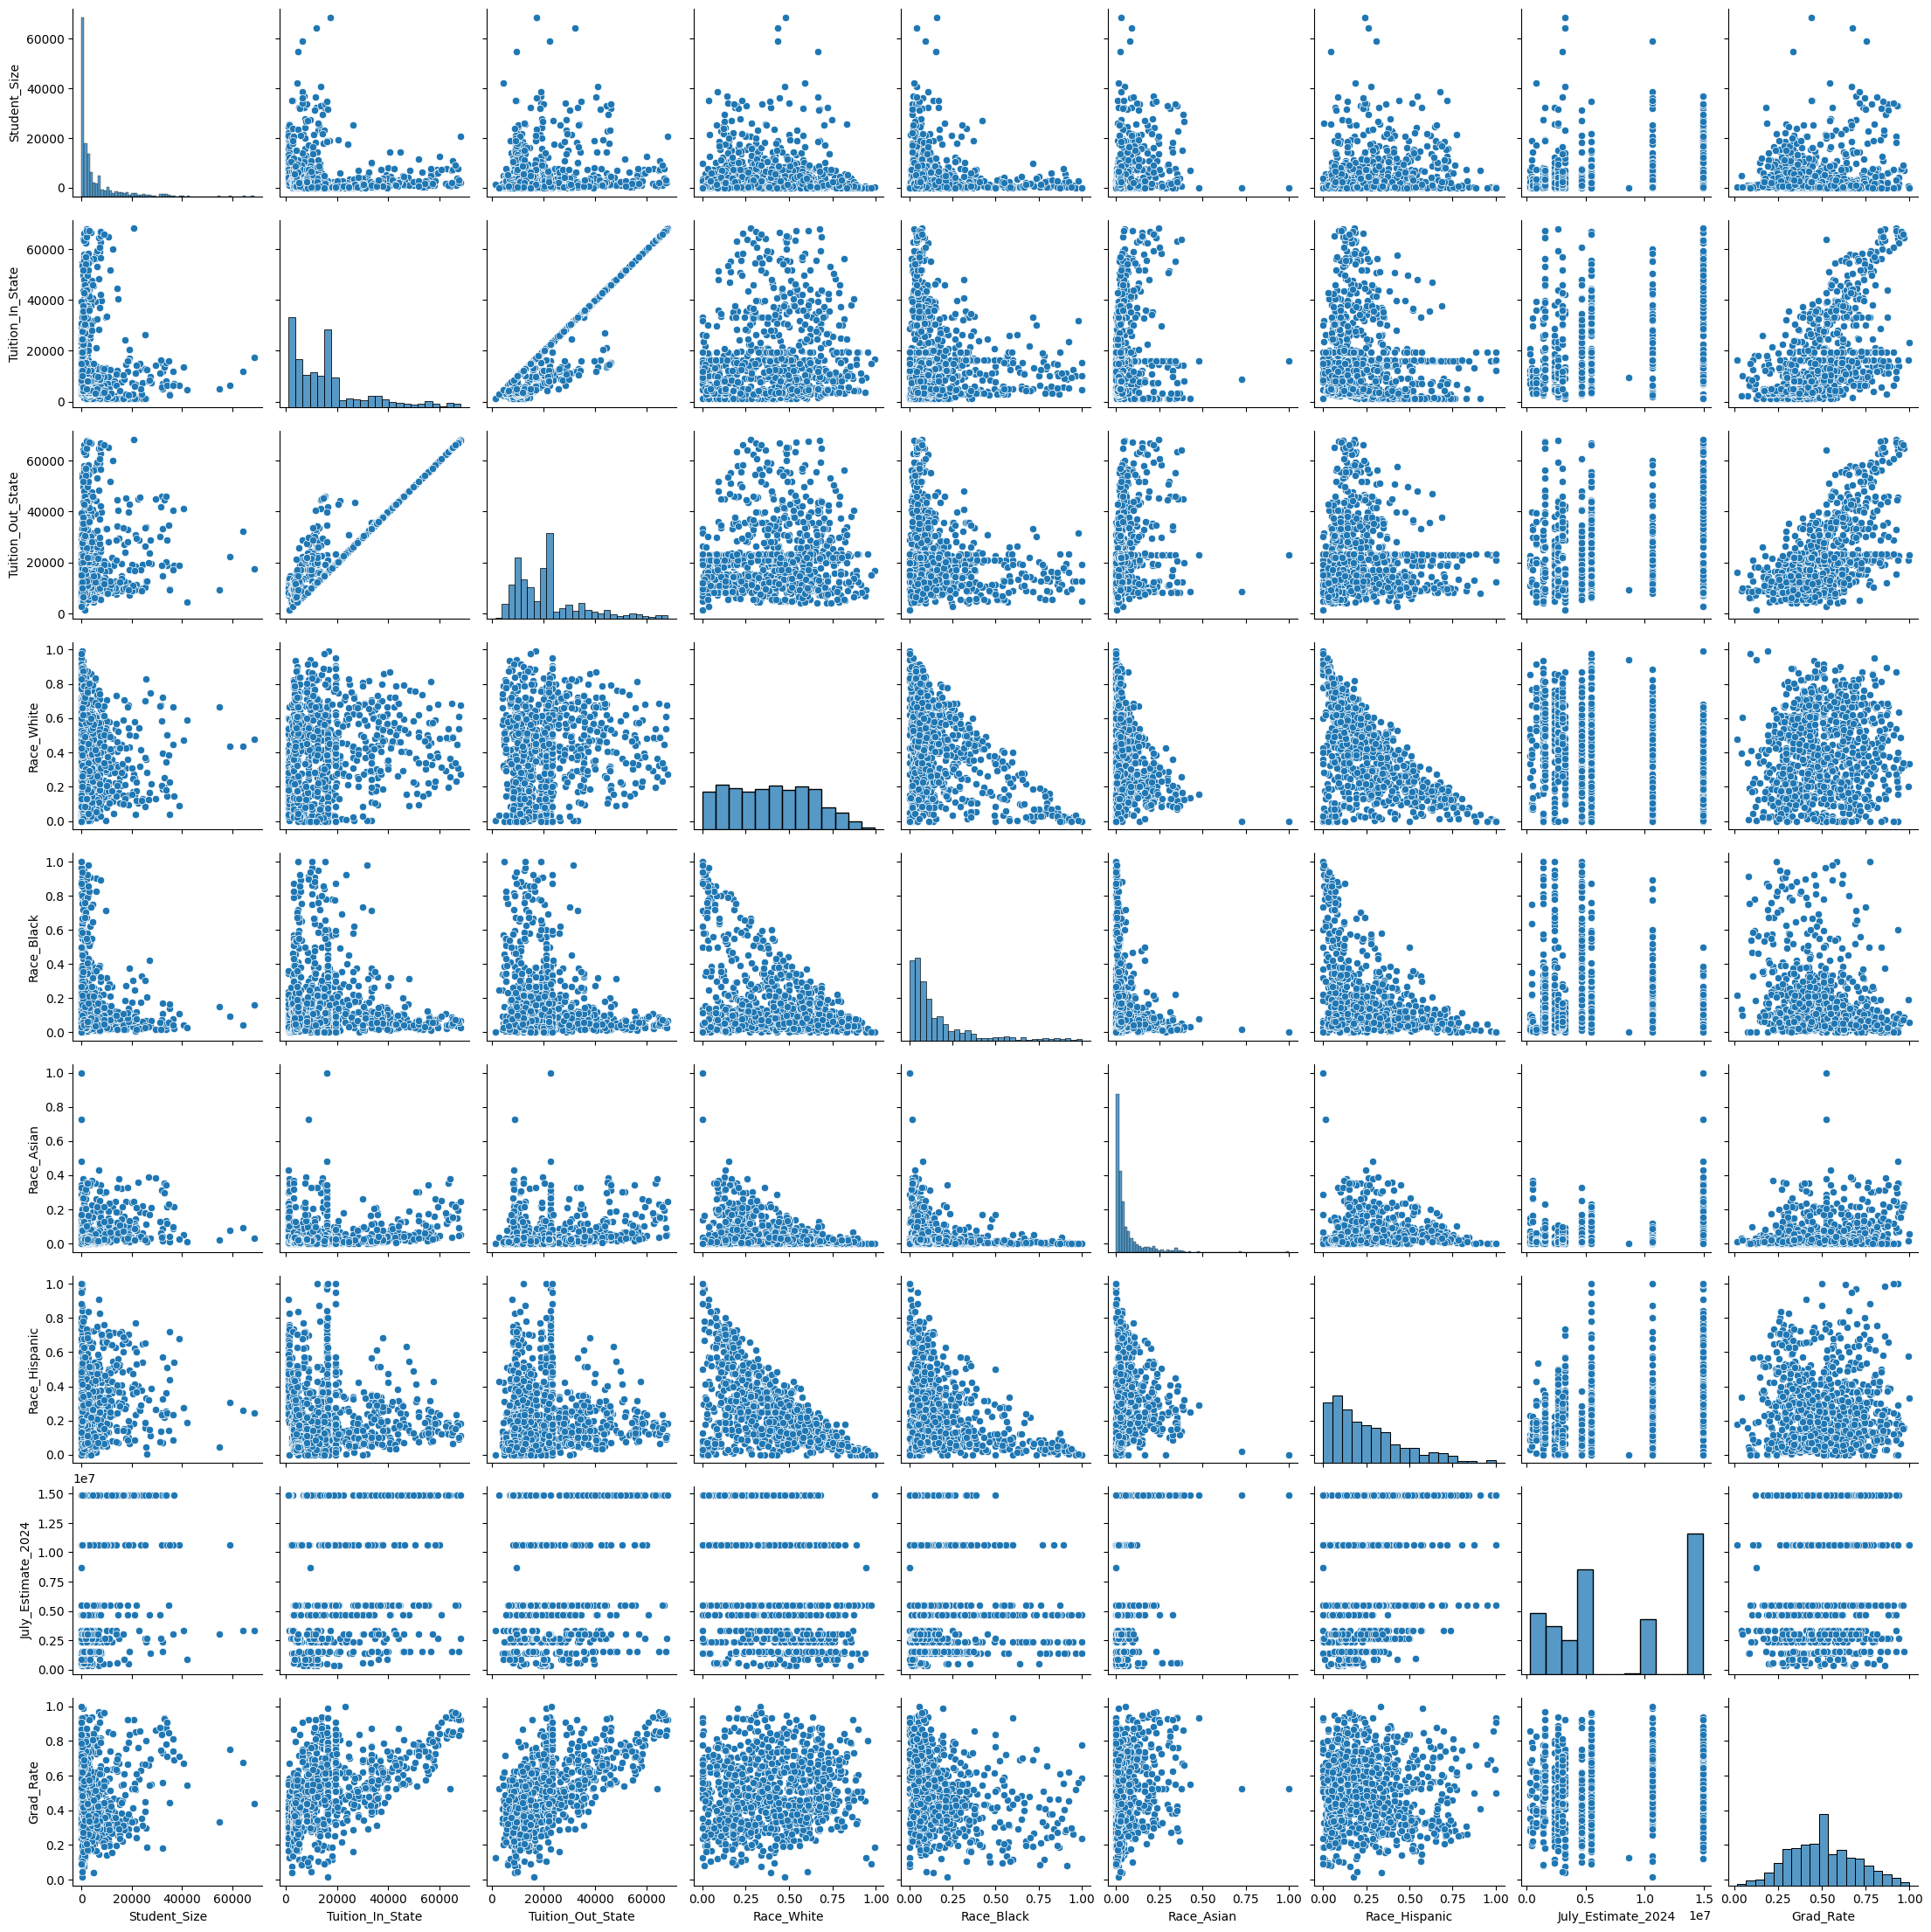

In [ ]:
#big pairplot of all the variables 
sns.pairplot(data[['Student_Size', 'Tuition_In_State', 'Tuition_Out_State', 'Race_White', 'Race_Black',
'Race_Asian', 'Race_Hispanic', 'July_Estimate_2024','Grad_Rate']])

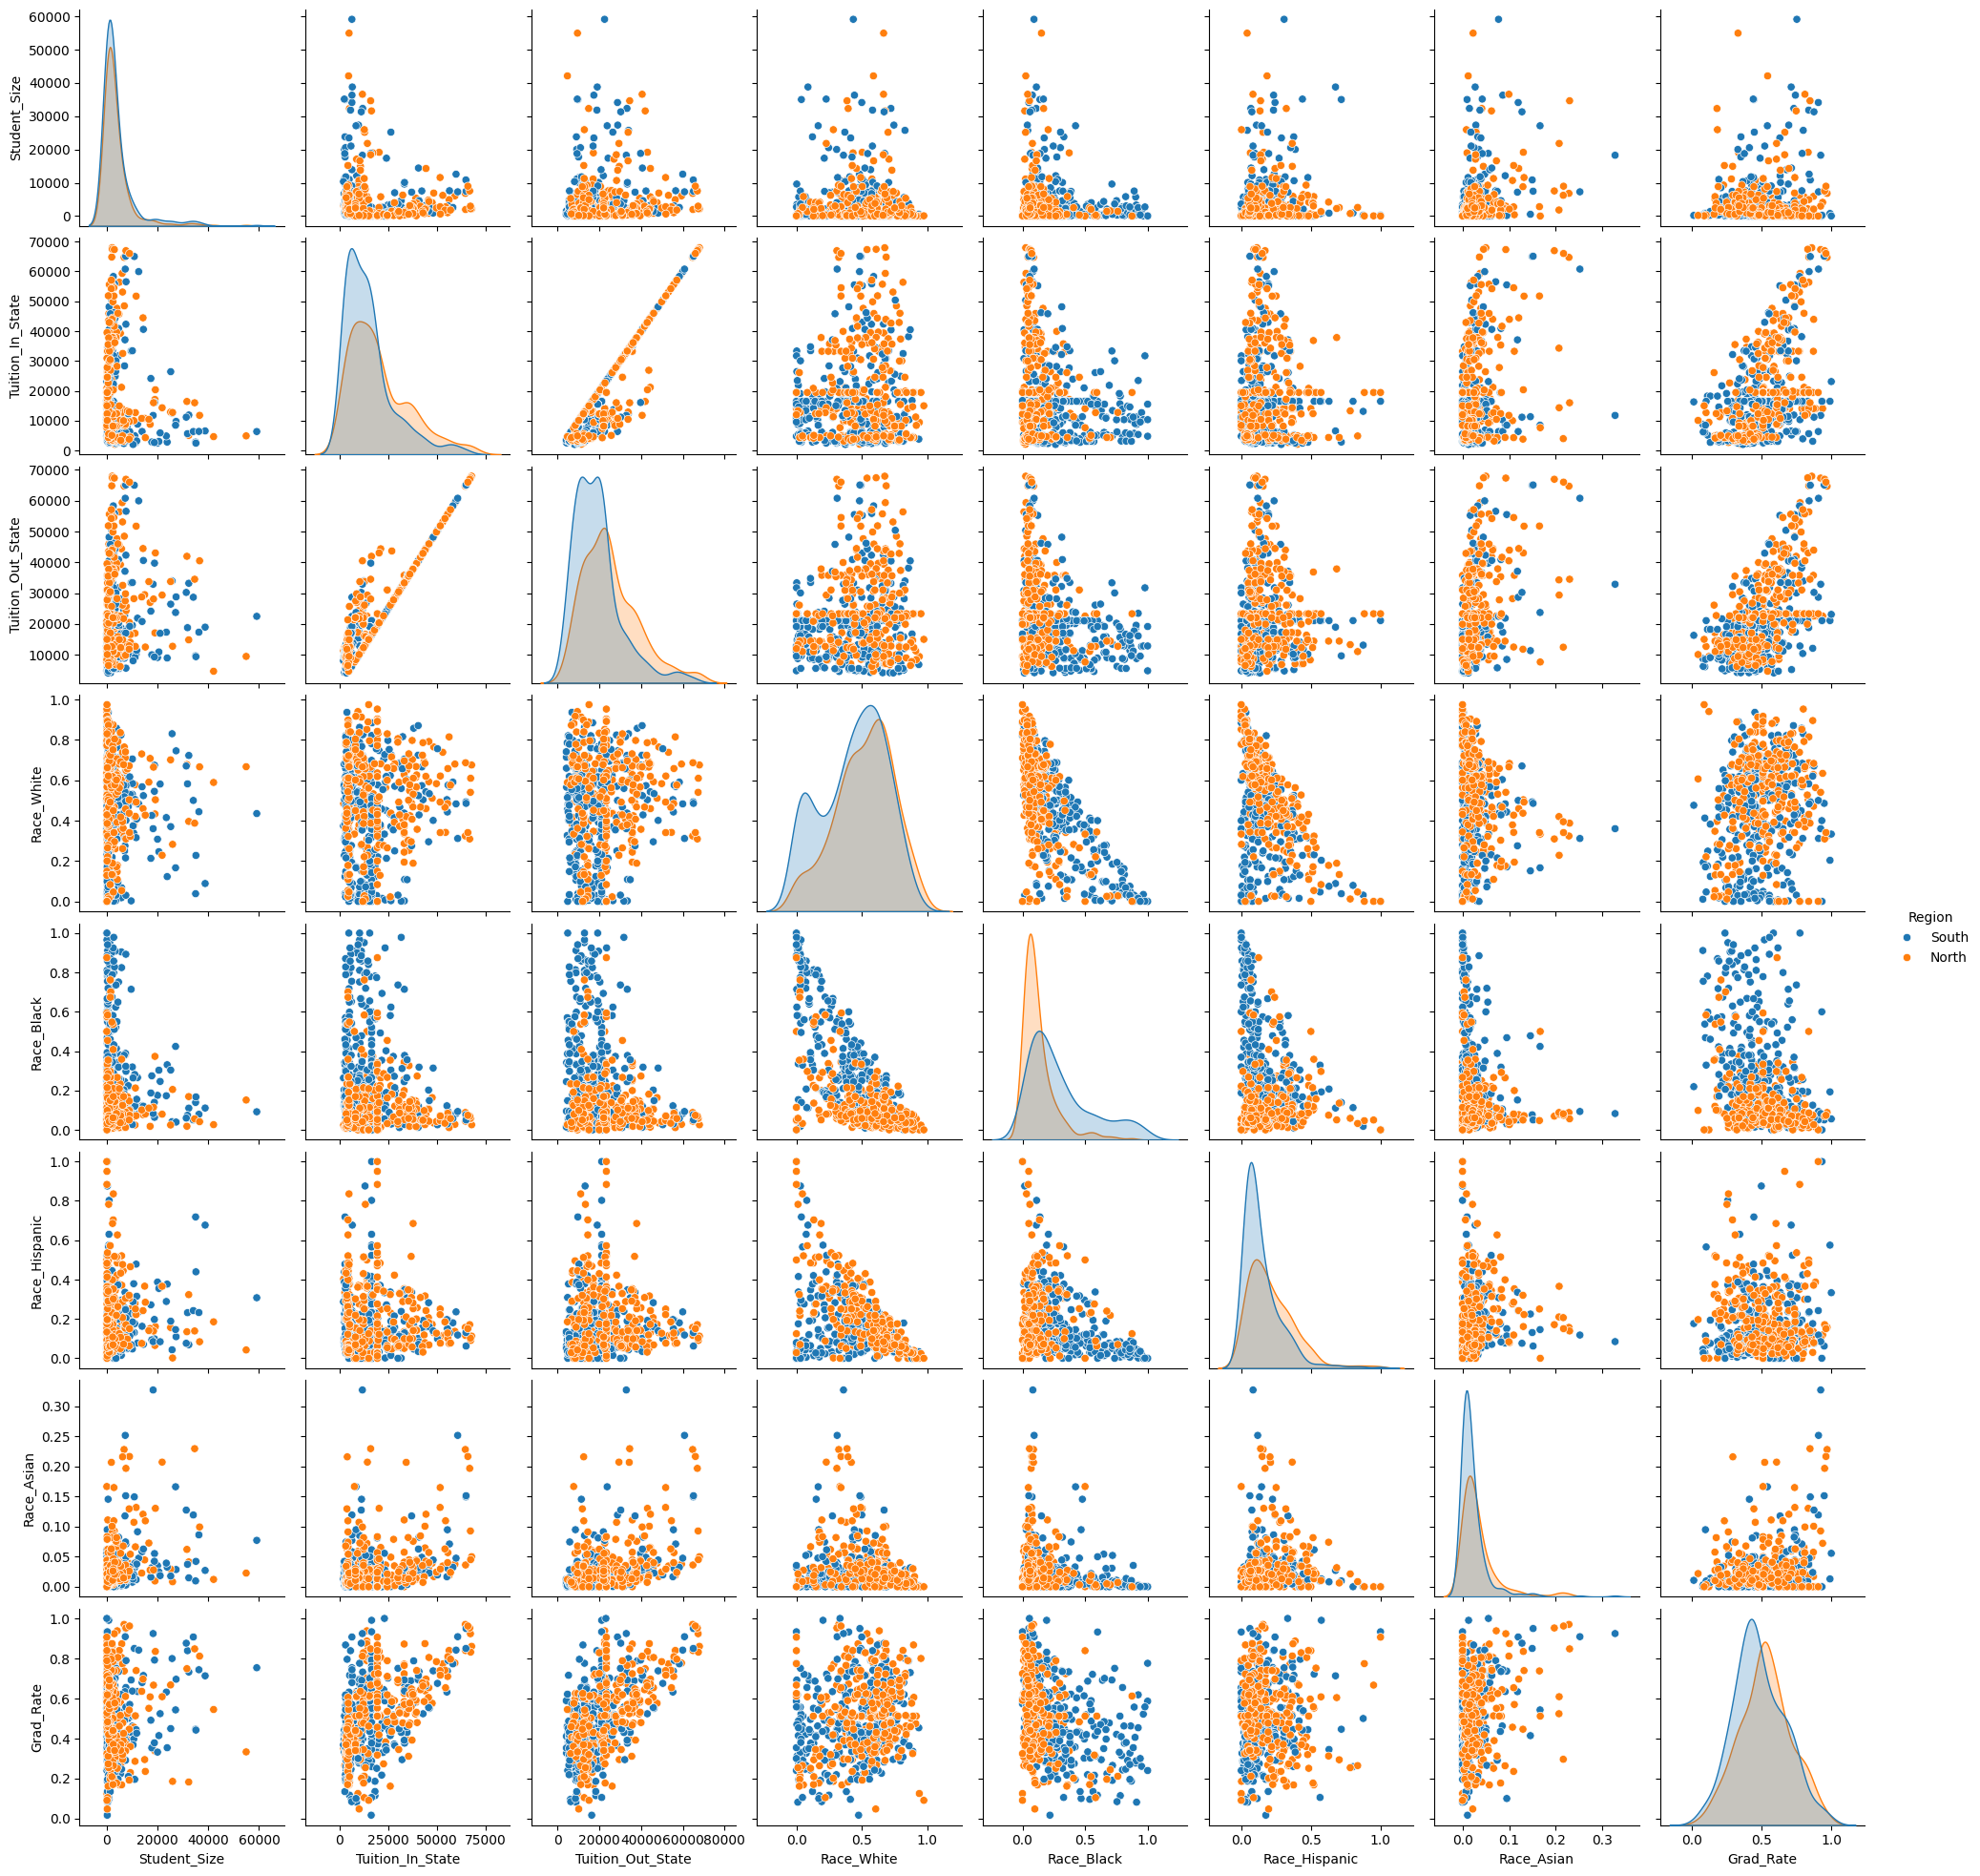

In [ ]:
# smaller pairplot with variables specified. 

cols_drop = ['Female_Share', 'School_Name', 'City', 'State', 'id', 'July_Estimate_2024', 'Region_numeric', 'Race_AIAN', 'Race_NHPI'
, 'Race_Two_Or_More']
dropped_cols = data.drop(cols_drop, axis=1)
sns.pairplot(dropped_cols, hue = "Region")

In [ ]:
# summary stats on the whole data 
data.describe()

,Student_Size,Tuition_In_State,Tuition_Out_State,Female_Share,Race_White,Race_Black,Race_Hispanic,Race_Asian,Race_AIAN,Race_NHPI,Race_Two_Or_More,Grad_Rate,id,July_Estimate_2024,Region_numeric
count,937.000000,999.000000,999.000000,863.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,999.000000,1000.0000,9.880000e+02,626.000000
mean,4894.967983,16573.863232,21850.204571,0.605576,0.398195,0.166731,0.256833,0.057257,0.009128,0.003922,0.043904,0.507368,126723.1950,7.947942e+06,0.468051
std,8109.876927,15071.625576,13353.262561,0.140958,0.237496,0.201430,0.208431,0.086143,0.040523,0.009823,0.043415,0.188189,15159.9182,5.400004e+06,0.499377
min,2.000000,1104.000000,1410.000000,0.025592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016700,100654.0000,3.304630e+05,0.000000
25%,375.000000,4881.000000,11396.000000,0.543774,0.194500,0.040600,0.092100,0.009900,0.000900,0.000000,0.019600,0.368750,112439.7500,3.026199e+06,0.000000
50%,1614.000000,14067.394737,20544.000000,0.598770,0.398600,0.090700,0.200000,0.026200,0.002500,0.001300,0.037500,0.511828,127171.5000,5.482770e+06,0.000000
75%,5697.000000,19449.607143,24224.000000,0.665277,0.590500,0.200000,0.368500,0.064900,0.005900,0.003500,0.055300,0.633700,139988.2500,1.487790e+07,1.000000
max,68619.000000,68237.000000,68237.000000,0.978996,0.993600,1.000000,1.000000,1.000000,0.990700,0.100000,0.431900,1.000000,151388.0000,1.487790e+07,1.000000


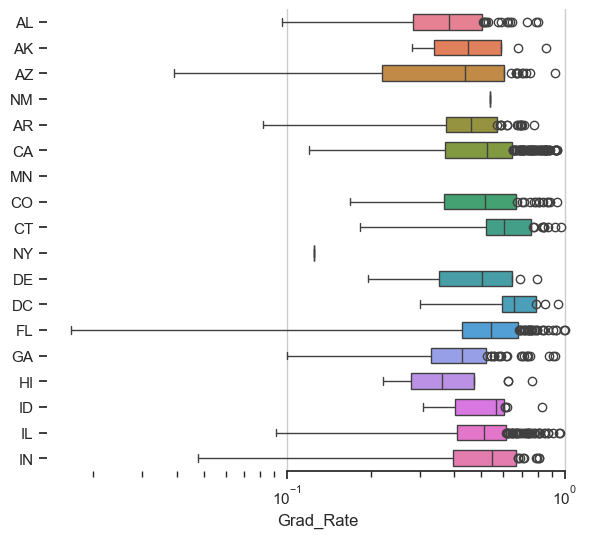

In [ ]:
#boxplots
sns.set_theme(style = "ticks")

f, ax = plt.subplots(figsize =(7,6))
ax.set_xscale("log")

sns.boxplot(
    data, x="Grad_Rate", y="State", hue = "State",
    whis=[0,10], width = .6
)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

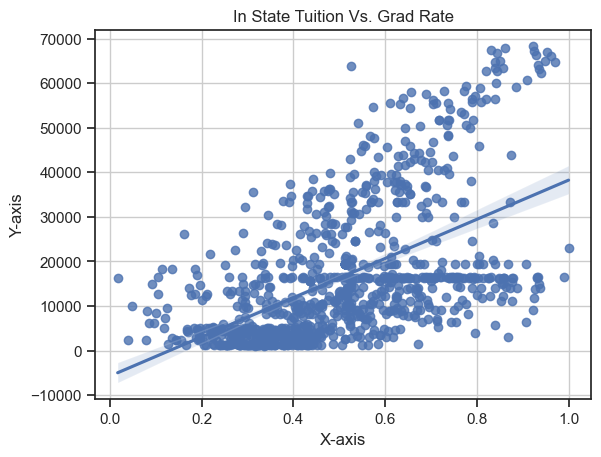

In [ ]:
#linear regression line tuition vs Grad rate
x = data['Grad_Rate']
y = data['Tuition_In_State']


sns.regplot(x='Grad_Rate', y='Tuition_In_State', data=data)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('In State Tuition Vs. Grad Rate')
plt.grid(True)
plt.show()

In [ ]:
#smaller regression model 
X = dropped_na[['Student_Size', 'Tuition_In_State', 'Tuition_Out_State', 'Region_numeric']]
y = dropped_na['Grad_Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Coefficients: [ 2.19323220e-06 -2.38317495e-06  1.14899535e-05 -3.72713468e-02]
Intercept: 0.28883021499055983
Mean Squared Error: 0.020479592983903977
R-squared: 0.2711396143816296


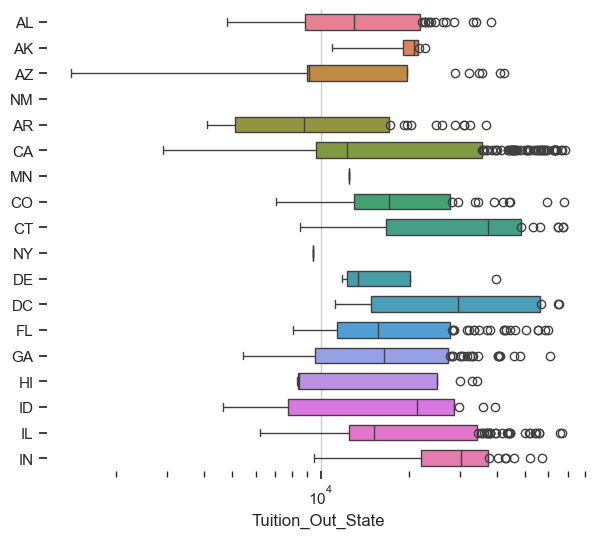

In [ ]:
#boxplot 
sns.set_theme(style = "ticks")

f, ax = plt.subplots(figsize =(7,6))
ax.set_xscale("log")

sns.boxplot(
    data, x="Tuition_Out_State", y="State", hue = "State",
    whis=[0,10], width = .6
)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
